In [3]:
from plotnine import *
import pandas as pd
import numpy as np
import pickle

In [4]:
array = np.load('./experiments/binary-expert-smart_policies_2_worlds_10_trials_10.npy')

In [5]:
num_list = [20, 50, 100, 200, 400, 800, 1000]
array.shape

(700, 2)

In [6]:
np.split(array, 7,axis=0)
entries = {}
for index, arr in enumerate(np.split(array, 7,axis=0)):
    entries[num_list[index]] = arr
#pickle.dump(entries, open('./experiments/binary-expert-smart_policies_2_worlds_10_trials_10.pkl','wb'))

In [7]:
entries = pickle.load(open('./experiments/binary-expert-smart_policies_2_worlds_10_trials_10.pkl','rb'))

In [8]:
# aggregate accuracy
data_agg = entries.copy()
for key,arr in data_agg.items():
    data_agg[key] = arr.sum(axis=1) / 2

In [9]:
df = pd.DataFrame(data_agg)

In [10]:
df.mean()

20      0.66158
50      0.74179
100     0.80651
200     0.83106
400     0.84711
800     0.85654
1000    0.85370
dtype: float64

In [11]:
df.head()
df.columns.tolist()

[20, 50, 100, 200, 400, 800, 1000]

In [12]:
stats = df.describe()
stats

,20,50,100,200,400,800,1000
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.66158,0.741790,0.806510,0.831060,0.847110,0.856540,0.853700
std,0.09060,0.096543,0.058856,0.045238,0.017852,0.016891,0.036833
min,0.43900,0.427000,0.488000,0.557000,0.803000,0.815000,0.523000
25%,0.60300,0.707750,0.798000,0.822750,0.833000,0.846000,0.848000
50%,0.67400,0.769000,0.819500,0.841000,0.848500,0.859000,0.857000
75%,0.73125,0.809500,0.838000,0.852250,0.860000,0.867000,0.867000
max,0.82500,0.875000,0.867000,0.886000,0.888000,0.905000,0.903000


In [13]:
plot_data = pd.DataFrame({'x':df.columns.tolist(), 'y':stats.loc['mean', :].tolist(), 'ymin':stats.loc['25%', :].tolist(), 'ymax':stats.loc['75%', :].tolist() })

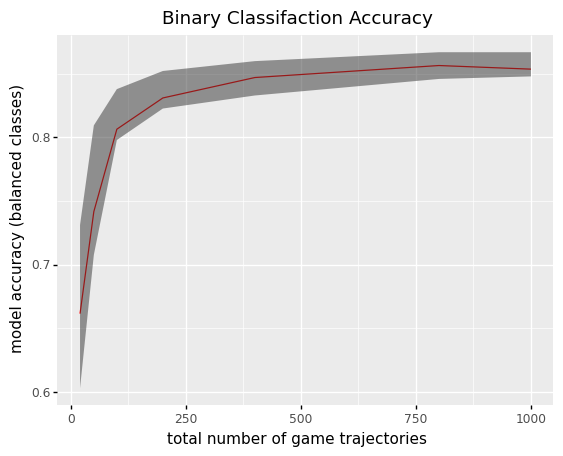

<ggplot: (8779135880153)>

In [27]:
ggplot(plot_data) + geom_line(aes(x='x', y='y'), color='red') + geom_ribbon(aes(ymin='ymin', ymax='ymax', x='x'),alpha=.5) + xlab('total number of game trajectories') + ylab('model accuracy (balanced classes)') + ggtitle('Binary Classifaction Accuracy')#ggtitle('Model Accuracy vs Training Set Size for Binary Classification\nbetween "expert" and "smart" policies, over 10 randomly generated worlds.\nwith World Size=20, Shortcut density=.1') 

In [22]:
def pickle_to_df(path):
    entries = pickle.load(open('./experiments/binary-expert-smart_policies_2_worlds_10_trials_10.pkl','rb'))
    # aggregate accuracy
    data_agg = entries.copy()
    for key,arr in data_agg.items():
        data_agg[key] = arr.sum(axis=1) / 2
    df = pd.DataFrame(data_agg)
    return df

def status_df(df):
    stats = df.describe()
    plot_data = pd.DataFrame({'x':df.columns.tolist(), 'y':stats.loc['mean', :].tolist(), 'ymin':stats.loc['25%', :].tolist(), 'ymax':stats.loc['75%', :].tolist() })
    return plot_data

